<a href="https://colab.research.google.com/github/guilhermecgs/apdoac/blob/master/apdoac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados da tese de mestrado APDOAC

In [2]:
!npx degit guilhermecgs/apdoac/dados -f

npx: installed 1 in 1.219s
> destination directory is not empty. Using --force, continuing
> cloned guilhermecgs/apdoac#master


In [3]:
! pip install pandas
! pip install tqdm
! pip install xlsx2csv

     |████████████████████████████████| 245kB 3.3MB/s 
  Created wheel for xlsx2csv: filename=xlsx2csv-0.7.7-cp36-none-any.whl size=44870 sha256=44d181831b5527f72f78d34f8fa77b76bc628982a312d6837b21e1f9b3e31a5c
  Stored in directory: /root/.cache/pip/wheels/9f/d1/6e/1b6cbf7dcfe72469d95f2cd331a373e8e2fde30a5946d61dfd
Successfully built xlsx2csv


In [4]:
import pandas as pd


In [5]:
import os
import glob
from tqdm.notebook import trange, tqdm
from xlsx2csv import Xlsx2csv
  

def concat(pathname):
  arquivos = glob.glob(pathname)
  print('Unindo arquivos:')
  print('\n    -'.join(arquivos))

  dfs = []
  for arquivo in tqdm(arquivos):
    arquivo_csv = arquivo.replace('xlsx', 'csv')
    if not os.path.isfile(arquivo_csv):
      Xlsx2csv(arquivo, outputencoding="utf-8").convert(arquivo.replace('xlsx', 'csv'))

    dfs.append(pd.read_csv(arquivo_csv))
    
  return pd.concat(dfs)


In [6]:
df_discentes = concat('discente/*.xlsx')



Unindo arquivos:
discente/br-capes-colsucup-discentes-2013a2016-2020-06-12_2014.xlsx
    -discente/br-capes-colsucup-discentes-2013a2016-2020-06-12_2016.xlsx
    -discente/br-capes-colsucup-discentes-2013a2016-2020-06-12_2015.xlsx
    -discente/br-capes-colsucup-discentes-2013a2016-2020-06-12_2013.xlsx


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
print(len(df_discentes[(df_discentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'ENGENHARIAS') 
                        & (df_discentes['AN_BASE'] == 2016)
                        & (df_discentes['TP_SEXO_DISCENTE'] == 'FEMININO')
                        ].index))


15129


In [14]:
df_discentes.head(3)

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,DS_DEPENDENCIA_ADMINISTRATIVA,NM_MODALIDADE_PROGRAMA,NM_GRAU_PROGRAMA,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_REGIAO,SG_UF_PROGRAMA,NM_MUNICIPIO_PROGRAMA_IES,CD_CONCEITO_PROGRAMA,CD_CONCEITO_CURSO,ID_PESSOA,TP_DOCUMENTO_DISCENTE,NR_DOCUMENTO_DISCENTE,NM_DISCENTE,NM_PAIS_NACIONALIDADE_DISCENTE,DS_TIPO_NACIONALIDADE_DISCENTE,TP_SEXO_DISCENTE,AN_NASCIMENTO_DISCENTE,DS_FAIXA_ETARIA,DS_GRAU_ACADEMICO_DISCENTE,ST_INGRESSANTE,NM_SITUACAO_DISCENTE,DT_MATRICULA_DISCENTE,DT_SITUACAO_DISCENTE,QT_MES_TITULACAO,NM_TESE_DISSERTACAO,NM_ORIENTADOR,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES
0,2014,CIÊNCIAS BIOLÓGICAS,9,CIÊNCIAS BIOLÓGICAS III,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,ACADÊMICO,MESTRADO/DOUTORADO,10001018002P1,BIOLOGIA EXPERIMENTAL,NORTE,RO,PORTO VELHO,3,3,834339,CPF,***.528.062-**,ANDONAI KRAUZE DE FRANCA,BRASIL,BRASILEIRO,MASCULINO,1977,35 A 39 ANOS,DOUTORADO,SIM,MATRICULADO,07MAY2014:00:00:00,07MAY2014:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,52358,115724
1,2014,MULTIDISCIPLINAR,49,CIÊNCIAS AMBIENTAIS,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,ACADÊMICO,MESTRADO,10001018017P9,CIÊNCIAS AMBIENTAIS,NORTE,RO,ROLIM DE MOURA,3,3,1460252,CPF,***.492.512-**,RICHELLY GISELA PASQUALOTTO TEIXEIRA,BRASIL,BRASILEIRO,FEMININO,1991,20 A 24 ANOS,MESTRADO,SIM,MATRICULADO,18AUG2014:00:00:00,18AUG2014:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,51138,114408
2,2014,MULTIDISCIPLINAR,48,BIOTECNOLOGIA,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,ACADÊMICO,DOUTORADO,12001015038P1,BIODIVERSIDADE E BIOTECNOLOGIA - REDE BIONORTE,NORTE,RO,PORTO VELHO,4,4,437724,CPF,***.757.282-**,LEIDIANE CAROLINE LAUTHARTTE,BRASIL,BRASILEIRO,FEMININO,1987,25 A 29 ANOS,DOUTORADO,SIM,MATRICULADO,03MAR2014:00:00:00,03MAR2014:00:00:00,0,NÃO SE APLICA,NÃO SE APLICA,49200,112306


Plotando número de mulheres com bolsas de mestrado na area de exatas

In [65]:

df_discentes.groupby('NM_GRAU_PROGRAMA').NM_GRAU_PROGRAMA.count()


NM_GRAU_PROGRAMA
DOUTORADO                 18634
MESTRADO                 194756
MESTRADO PROFISSIONAL    147525
MESTRADO/DOUTORADO       952529
Name: NM_GRAU_PROGRAMA, dtype: int64

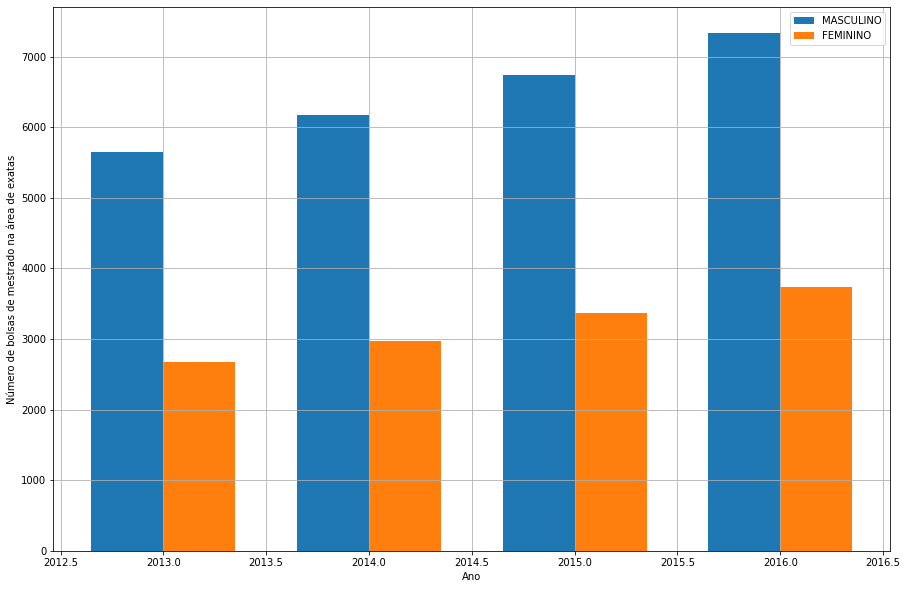

In [61]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15, 10))

width = 0.35
sexos = ['MASCULINO', 'FEMININO']

for sexo in sexos:
  df = df_discentes[((df_discentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'ENGENHARIAS')  
                     | (df_discentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'CIÊNCIAS EXATAS E DA TERRA')) 
                     & (df_discentes['TP_SEXO_DISCENTE'] == sexo)
                     & (df_discentes['NM_GRAU_PROGRAMA'] == 'MESTRADO')]
  
  
  series = df.groupby('AN_BASE').AN_BASE.count()
  if sexo == 'MASCULINO':
    ax.bar(series.index - width/2, series, width,  label=sexo)
  else:
    ax.bar(series.index + width/2, series, width,  label=sexo)

#df

ax.grid(True)
ax.set_xlabel("Ano")
ax.set_ylabel("Número de bolsas de mestrado na área de exatas")
ax.legend(loc='best')



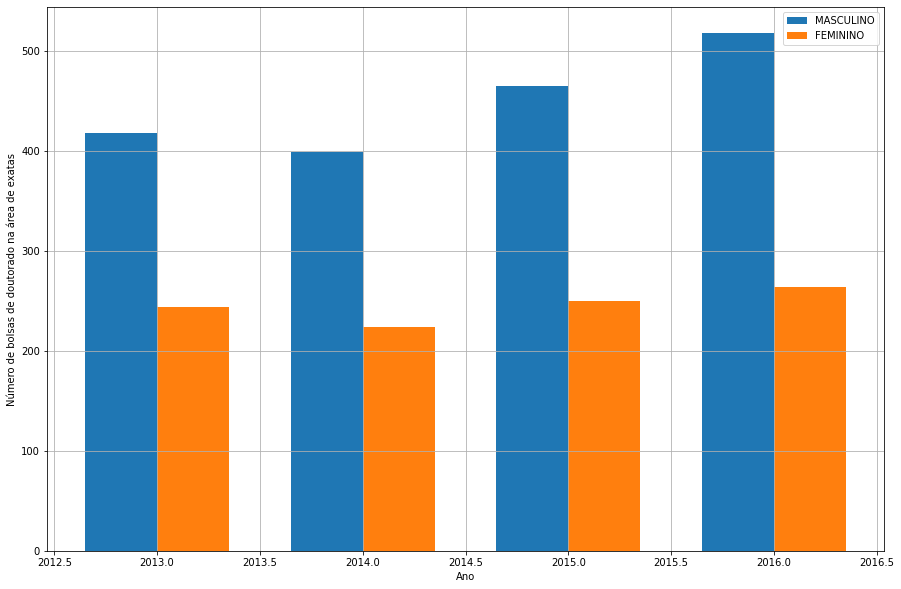

In [63]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15, 10))

width = 0.35
sexos = ['MASCULINO', 'FEMININO']

for sexo in sexos:
  df = df_discentes[((df_discentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'ENGENHARIAS')  
                     | (df_discentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'CIÊNCIAS EXATAS E DA TERRA')) 
                     & (df_discentes['TP_SEXO_DISCENTE'] == sexo)
                     & (df_discentes['NM_GRAU_PROGRAMA'] == 'DOUTORADO')]
  
  
  series = df.groupby('AN_BASE').AN_BASE.count()
  if sexo == 'MASCULINO':
    ax.bar(series.index - width/2, series, width,  label=sexo)
  else:
    ax.bar(series.index + width/2, series, width,  label=sexo)

#df

ax.grid(True)
ax.set_xlabel("Ano")
ax.set_ylabel("Número de bolsas de doutorado na área de exatas")
ax.legend(loc='best')



In [67]:
df_docentes = concat('docente/*.xlsx')

Unindo arquivos:
docente/br-capes-colsucup-docente-2013a2016-2020-06-12_2013.xlsx
    -docente/br-capes-colsucup-docente-2013a2016-2020-06-12_2014.xlsx
    -docente/br-capes-colsucup-docente-2018-2020-06-12.xlsx
    -docente/br-capes-colsucup-docente-2013a2016-2020-06-12_2015.xlsx
    -docente/br-capes-colsucup-curso-2017-2020-06-12.xlsx
    -docente/br-capes-colsucup-docente-2013a2016-2020-06-12_2016.xlsx


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [68]:
df_docentes

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,DS_DEPENDENCIA_ADMINISTRATIVA,CS_STATUS_JURIDICO,NM_MUNICIPIO_PROGRAMA_IES,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_DOCUMENTO_DOCENTE,NR_DOCUMENTO_DOCENTE,NM_DOCENTE,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,DS_TIPO_NACIONALIDADE_DOCENTE,NM_PAIS_NACIONALIDADE_DOCENTE,DS_CATEGORIA_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,CD_AREA_BASICA_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,DS_CLIENTELA_QUADRIENAL_2017,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,DS_ORGANIZACAO_ACADEMICA,CD_CURSO_PPG,NM_CURSO,NM_GRAU_CURSO,CD_CONCEITO_CURSO,AN_INICIO_PREVISTO,DS_SITUACAO_CURSO,DT_SITUACAO_CURSO
0,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,832956.0,CPF,***.482.422-**,NAJLA BENEVIDES MATOS,FEMININO,1975.0,35 A 39 ANOS,BRASILEIRO,BRASIL,COLABORADOR,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,21200009.0,MICROBIOLOGIA,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,52357,115723,AVALIAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,34738.0,CPF,***.643.068-**,ROBERTO NICOLETE,MASCULINO,1978.0,35 A 39 ANOS,BRASILEIRO,BRASIL,PERMANENTE,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,40300005.0,FARMÁCIA,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,52357,115723,AVALIAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,729344.0,CPF,***.869.251-**,MAURO SHUGIRO TADA,MASCULINO,1954.0,55 A 59 ANOS,BRASILEIRO,BRASIL,PERMANENTE,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,21300003.0,PARASITOLOGIA,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,BRASIL,52357,115723,AVALIAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,526496.0,CPF,***.526.588-**,RUBIANI DE CASSIA PAGOTTO,FEMININO,1966.0,45 A 49 ANOS,BRASILEIRO,BRASIL,PERMANENTE,SERVIDOR PÚBLICO,INTEGRAL,NaN,S,1999.0,DOUTORADO,20200005.0,GENÉTICA,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,52357,115723,AVALIAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,10001018,699,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,PÚBLICA,FEDERAL,PORTO VELHO,RO,NORTE,10229.0,CPF,***.767.888-**,LUIZ HILDEBRANDO PEREIRA DA SILVA,MASCULINO,1928.0,70 OU MAIS,BRASILEIRO,BRASIL,PERMANENTE,APOSENTADO,PARCIAL,NaN,S,1960.0,DOUTORADO,40100006.0,MEDICINA,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,52357,115723,AVALIAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95241,2016,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO PÚBLICA,53045009001P3,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,MESTRADO PROFISSIONAL,PROFISSIONAL,3,4

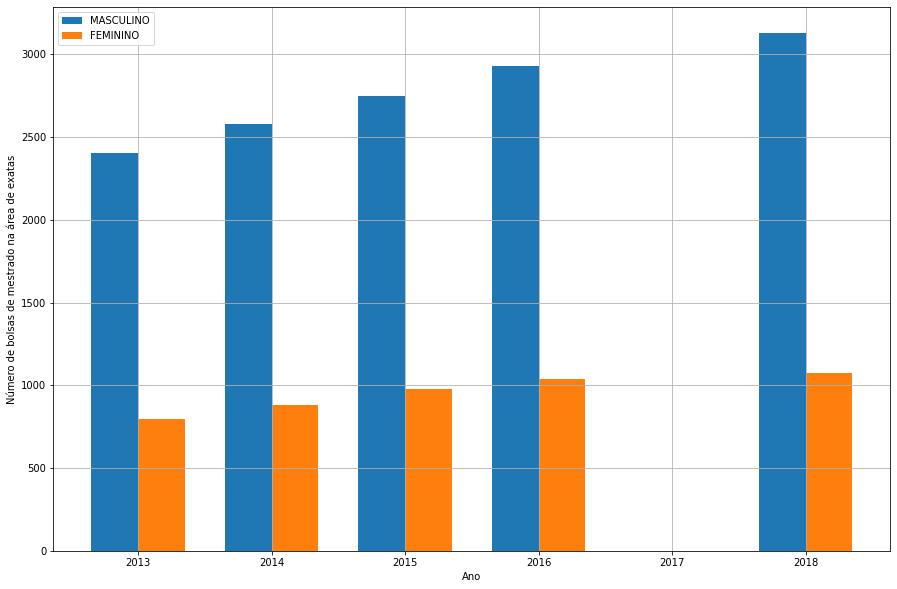

In [71]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15, 10))

width = 0.35
sexos = ['MASCULINO', 'FEMININO']

for sexo in sexos:
  df = df_docentes[((df_docentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'ENGENHARIAS')  
                     | (df_docentes['NM_GRANDE_AREA_CONHECIMENTO'] == 'CIÊNCIAS EXATAS E DA TERRA')) 
                     & (df_docentes['TP_SEXO_DOCENTE'] == sexo)
                     & (df_docentes['NM_GRAU_PROGRAMA'] == 'MESTRADO')]
  
  
  series = df.groupby('AN_BASE').AN_BASE.count()
  if sexo == 'MASCULINO':
    ax.bar(series.index - width/2, series, width,  label=sexo)
  else:
    ax.bar(series.index + width/2, series, width,  label=sexo)

#df

ax.grid(True)
ax.set_xlabel("Ano")
ax.set_ylabel("Número de bolsas de mestrado na área de exatas")
ax.legend(loc='best')
